In [1]:
from run_sim import main
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# set up dataframe for collecting event data
time_network, adversary = main(start_time=7000)


Adversary: Start SCAN_PORT at 7000.0s.
MTD: PortShuffle triggered 7000.0s
MTD: PortShuffle deployed in the network at 7000.0s.
Adversary: Processed SCAN_PORT at 7010.0s.
Adversary: Start EXPLOIT_VULN at 7010.0s.
Adversary: Processed EXPLOIT_VULN at 7030.0s.
Adversary: Host 89 has been compromised at 7030.0s!
Adversary: Start SCAN_NEIGHBOR at 7030.0s.
MTD: osdiversity triggered 7030.3s
MTD: osdiversity suspended at 7030.3s due to resource occupation
MTD: PortShuffle finished in 31.2s at 7031.2s.
Adversary: Processed SCAN_NEIGHBOR at 7035.0s.
Adversary: Start ENUM_HOST at 7035.0s.
Adversary: Processed ENUM_HOST at 7037.0s.
Adversary: Start ENUM_HOST at 7037.0s.
Adversary: Processed ENUM_HOST at 7039.0s.
Adversary: Start ENUM_HOST at 7039.0s.
Adversary: Processed ENUM_HOST at 7041.0s.
Adversary: Start ENUM_HOST at 7041.0s.
Adversary: Processed ENUM_HOST at 7043.0s.
Adversary: Start ENUM_HOST at 7043.0s.
Adversary: Processed ENUM_HOST at 7045.0s.
Adversary: Start ENUM_HOST at 7045.0s.
Adve

In [3]:
print(time_network.get_mtd_stats().dict())
mtd_operation_record = pd.DataFrame(time_network.get_mtd_stats().get_record())

mtd_operation_record

{'Total suspended MTD': 237, 'Total triggered MTD': 984, 'Total executed MTD': 746, 'Total attack interrupted': 323, 'Switch MTD interval at': {}, 'Switch MTD strategy at': {}}


,name,start_time,finish_time,duration
0,UserShuffle,0.000000,10.059518,10.059518
1,serviceDiversity,30.613814,60.614319,30.000504
2,CompleteTopologyShuffle,60.938255,130.956996,70.018741
3,serviceDiversity,181.589498,211.855380,30.265882
4,CompleteTopologyShuffle,151.540138,221.665310,70.125172
...,...,...,...,...
741,UserShuffle,29859.179622,29869.315750,10.136128
742,HostTopologyShuffle,29889.345130,29919.705276,30.360146
743,PortShuffle,29951.047060,29981.108088,30.061028
744,CompleteTopologyShuffle,29919.899927,29990.564352,70.664425


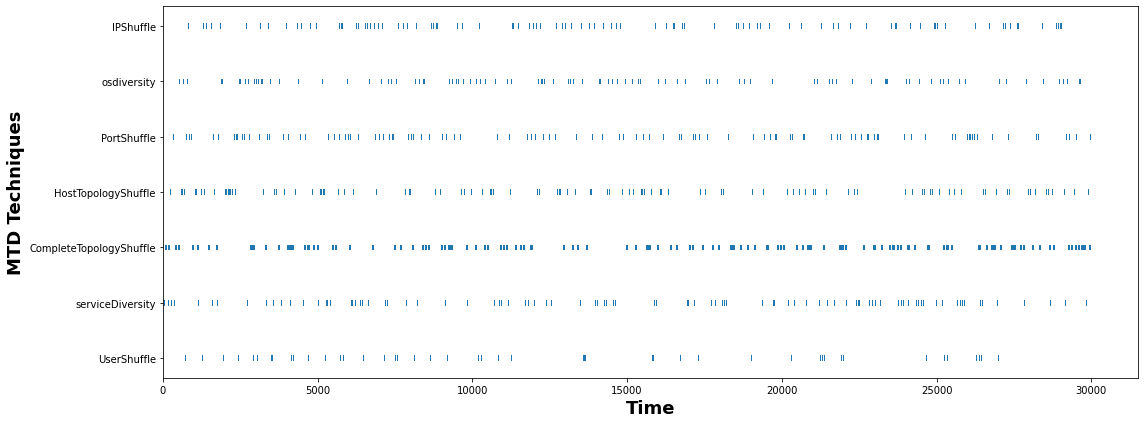

In [4]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.show()

In [5]:
attack_operation_record = pd.DataFrame(adversary.get_attack_stats().get_record())
attack_operation_record

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,5.000000,5.000000,-1,0,0,0,,[],,
1,ENUM_HOST,5.000000,7.000000,2.000000,-1,0,0,0,,[],,
2,SCAN_PORT,7.000000,17.000000,10.000000,0,1,0,0,,[],,
3,EXPLOIT_VULN,17.000000,38.554154,21.554154,0,1,0,0,0,"[Donielle, Fidelia, Tawsha, Hilliary, Rasla]",,
4,SCAN_NEIGHBOR,38.554154,43.554154,5.000000,0,1,26,1,,[],,
...,...,...,...,...,...,...,...,...,...,...,...,...
2101,ENUM_HOST,15768.357775,15770.357775,2.000000,-1,1,859,197,,[],,
2102,SCAN_PORT,15770.357775,15780.357775,10.000000,19,10,859,197,,[],,
2103,EXPLOIT_VULN,15780.357775,15800.567874,20.210098,19,10,859,197,,[],,
2104,BRUTE_FORCE,15800.567874,15812.444130,11.876256,19,10,859,197,,[],network,HostTopologyShuffle


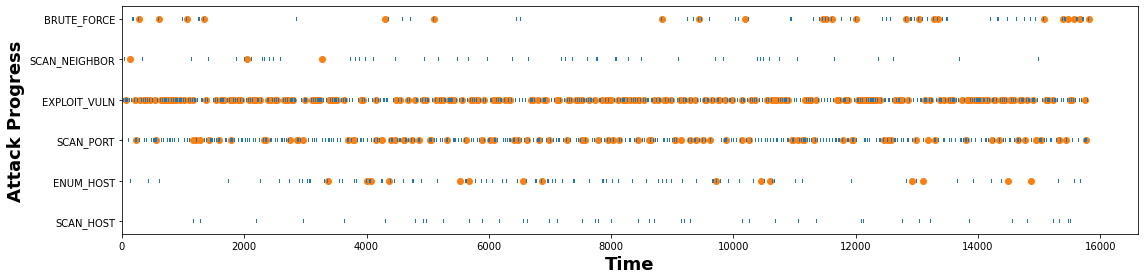

In [6]:
fig2, ax2 = plt.subplots(1, figsize=(16, 4))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1)
interrupted_record = attack_operation_record[attack_operation_record['interrupted_by'] != '']
ax2.scatter( interrupted_record['finish_time'], interrupted_record['name'])
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.show()

In [7]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
54,SCAN_PORT,511.617065,521.617065,10.0,22,1,200,6,22,"[Doloritas, Eolanda, Magdaia, Sadie]",,
162,SCAN_PORT,1439.938504,1449.938504,10.0,23,1,253,12,23,"[Sharline, Lissy, Flss]",,
165,SCAN_PORT,1456.938504,1466.938504,10.0,22,2,253,13,22,"[Michele, Romola, Susannah, Erin]",,
191,SCAN_PORT,1684.380782,1694.380782,10.0,52,2,277,16,52,"[Adriane, Minnie, Steffane]",,
224,SCAN_PORT,1953.580748,1963.580748,10.0,38,1,298,19,38,"[Carolyne, Odelinda, Sophi, Cybil]",,
276,SCAN_PORT,2321.282568,2331.282568,10.0,99,1,375,25,99,"[Athene, Pat, Catlee, Avie]",,
307,SCAN_PORT,2578.889722,2588.889722,10.0,42,3,383,29,42,"[Terza, Chantal, Rowe]",,
312,SCAN_PORT,2599.889722,2609.889722,10.0,44,2,383,30,44,"[Pavia, Kassia]",,
326,SCAN_PORT,2721.815006,2731.815006,10.0,58,4,383,31,58,"[Madelyn, Jackelyn, Cherin]",,
343,SCAN_PORT,2883.853256,2893.853256,10.0,49,2,385,32,49,"[Emelita, Eolande, Shirleen, Jenni]",,


In [8]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
3,EXPLOIT_VULN,17.000000,38.554154,21.554154,0,1,0,0,0,"[Donielle, Fidelia, Tawsha, Hilliary, Rasla]",,
9,EXPLOIT_VULN,72.614319,92.918535,20.304216,42,1,26,1,42,"[Mamie, Dore, Jaquith, Ginny, Josey]",,
13,EXPLOIT_VULN,109.918535,130.409591,20.491057,46,1,66,2,46,"[Hanna, Carly, Frederica, Pansy, Devinne]",,
34,EXPLOIT_VULN,314.685549,335.149514,20.463965,49,1,120,3,49,"[Celina, Jania, Valry, Kimberley, Vivia]",,
42,EXPLOIT_VULN,404.801113,425.381209,20.580096,31,1,160,4,31,"[Gennie, Darlene, Maribeth, Raven, Deidre]",,
...,...,...,...,...,...,...,...,...,...,...,...,...
1926,EXPLOIT_VULN,14084.434469,14108.228098,23.793628,11,1,844,190,11,[],,
2008,EXPLOIT_VULN,14968.357410,14988.581829,20.224419,13,5,844,191,13,[],,
2031,EXPLOIT_VULN,15152.285066,15174.184732,21.899666,15,3,849,193,15,[],,
2044,EXPLOIT_VULN,15249.714372,15270.188190,20.473818,17,2,853,195,17,[],,


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by


In [10]:
if not os.path.exists('data_analysis'):
    os.makedirs(os.path.dirname('data_analysis'))

attack_operation_record.to_csv('data_analysis/attack_operation_record.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record.csv', index=False)

In [11]:
attack_operation_record = pd.read_csv('data_analysis/attack_operation_record.csv')